# Style Transfer Notebook

- Based on https://www.tensorflow.org/tutorials/generative/style_transfer?hl=en
- Style transfer paper: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.12.0'

## Loading the pre-trained convolutional neural network (VGG19)


In [2]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

80134624/80134624 [==============================] - 3s 0us/step


In [3]:
network.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [4]:
len(network.layers)

22

## Loading and pre-processing the images

### Content image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
content_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/My Documents/CV-Course/Images/chaves.jpeg')

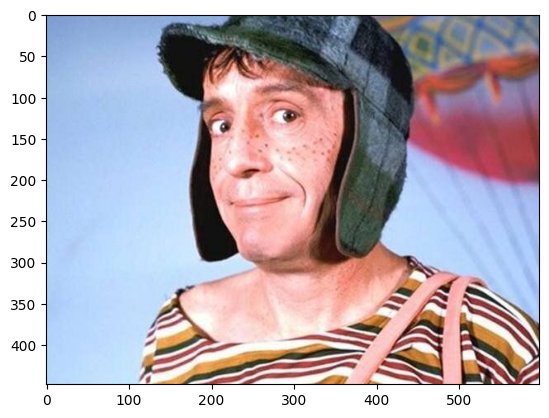

In [8]:
plt.imshow(content_image);

In [9]:
type(content_image)

PIL.JpegImagePlugin.JpegImageFile

In [10]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [11]:
type(content_image), content_image.shape, content_image.min(), content_image.max()

(numpy.ndarray, (448, 598, 3), 0.0, 255.0)

In [12]:
content_image = content_image / 255

In [12]:
content_image.min(), content_image.max()

In [13]:
content_image

array([[[0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        ...,
        [0.38039216, 0.4627451 , 0.54509807],
        [0.38039216, 0.4627451 , 0.54509807],
        [0.38039216, 0.4627451 , 0.54509807]],

       [[0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        ...,
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434]],

       [[0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        ...,
        [0.39215687, 0.47058824, 0.5686275 ],
        [0.39215687, 0.47058824, 0.5686275 ],
        [0.39215687, 0.47058824, 0.5686275 ]],

       ...,

       [[0.7294118 , 0.8627451 , 1.        ],
        [0.7254902 , 0.85882354, 1.        ],
        [0.7254902 , 0

In [13]:
content_image = content_image[tf.newaxis, :]

In [14]:
content_image.shape

(448, 598, 3)

### Style image

In [16]:
style_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/My Documents/CV-Course/Images/tarsila_amaral.jpg')

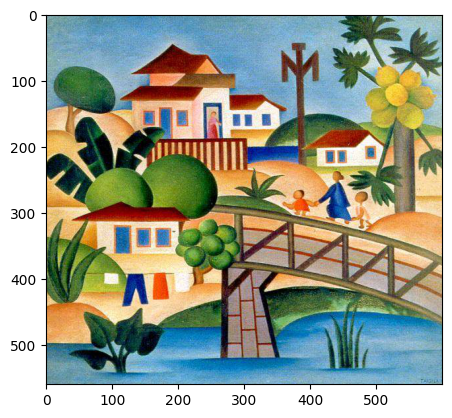

In [17]:
plt.imshow(style_image);

In [18]:
style_image = tf.keras.preprocessing.image.img_to_array(style_image)
style_image = style_image / 255
style_image = style_image[tf.newaxis, :]
style_image.shape

(1, 560, 600, 3)